In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

## thư viện để vẽ đồ thị
import matplotlib.pyplot as plt

## import thư viện backend, hỗ trợ nhũng hàm của keras
from keras import backend as K

Using TensorFlow backend.


In [0]:
# Tải dataset MNIST từ tensorflow
## MNIST là bài toán dự đoán một ảnh thể hiện ký tự số nào

## tải MNIST dataset từ keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

##in dataset
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print("Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test")
print("Mỗi ảnh có một kênh màu, kích thước 28x28")
print()

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Có 60000 ảnh dùng để train và valid, 10000 ảnh dùng để test
Mỗi ảnh có một kênh màu, kích thước 28x28



Ảnh đầu tiên của tập train
Label đầu tiên của tập train:  5


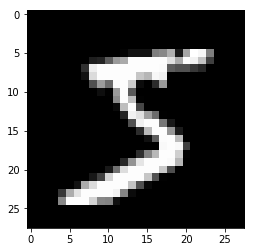

In [0]:
## in thử ảnh một ảnh
print("Ảnh đầu tiên của tập train")
print("Label đầu tiên của tập train: ", y_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [0]:
## Tạo layer input, mỗi data point có kích thước (28,28)
inputs = keras.layers.Input(shape=(28,28))
print("Kích thước input: {}".format(inputs.shape)) # dấu '?' tượng trưng cho số lượng ảnh một batch không xác định trước"

## Reshape input
## do input vào lớp convolutional layer cần có 4 chiều, chiều cuối là số kênh,
## ảnh mnist là ảnh xám nên chỉ có một kênh
inputs_reshape = keras.layers.Reshape((28,28,1))(inputs)
print("Kích thước sau reshape: {}".format(inputs_reshape.shape))


Kích thước input: (?, 28, 28)
Kích thước sau reshape: (?, 28, 28, 1)


In [0]:
## Tạo Convolutional Layer
### fileters: số lượng filter
### kernel_size: kích thước của filter
### strides: bước dịch của filter khi tính convolution
### padding: thêm số 0 hoặc không tính khi tính filter ở biên
### activation: hàm kích hoạt của lớp convolution
conv = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='same',
                                 activation=tf.nn.relu)(inputs_reshape)
print("Kích thước conv: {}, chiều cuối cùng chính là số filter".format(conv.shape))

## Maxpooling
## pool_size: kích thước pool để lấy max
## strides: bước dịch của pool 
maxpool = keras.layers.MaxPool2D(pool_size=[2,2])(conv)
print("Kích thước sau maxpool: {}".format(maxpool.shape))

## Flatten lớp conv trước khi cho vào lớp dense, vì lớp dense yêu cầu input chỉ là vector
flatten = keras.layers.Flatten()(maxpool)
print("Kích thước flatten: {}".format(flatten.shape))

Kích thước conv: (?, 28, 28, 20), chiều cuối cùng chính là số filter
Kích thước sau maxpool: (?, 14, 14, 20)
Kích thước flatten: (?, 3920)


In [0]:
## Lớp Fully conntected với hàm kích hoạt softmax
softmax = keras.layers.Dense(units=10, activation='softmax')(flatten)

## Tạo model, với input là lớp inputs, outputs là lớp softmax
model = keras.models.Model(inputs=inputs, outputs=softmax)

## Compile model, 
### optimizer là adam 
### loss function là sparse_categorical_crossentropy
### metrics: để theo dõi các đánh giá trong quá trình huấn luyện
model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])
    

## In toàn bộ cấu trúc của model
print("Cấu trúc của model: ")
model.summary()

Cấu trúc của model: 
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3920)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                39210     
Total params: 39,730
Trainable params: 39,730
Non-trainable params: 0
__________________________________

In [0]:
# Dùng hàm fit để bắt đầu train
## 2 tham số đầu là 2 numpy array, X_train là ảnh, y_train là label
## batch_size: kích thước của data batch
## epochs: số epoch tối đa muốn chạy
## validation data: model sẽ được đánh giá trên tập valid mỗi epoch

history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=5,
                    validation_data=(X_valid, y_valid))

## Lưu model thành một file
model.save_weights("first_model.h5")


## Load model
model.load_weights("first_model.h5")

## Đánh giá model trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Accuracy trên tập test: ", test_acc)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 31s 575us/sample - loss: 0.2325 - acc: 0.9340 - val_loss: 0.1055 - val_acc: 0.9683
Epoch 2/5
54000/54000 [==============================] - 31s 575us/sample - loss: 0.0805 - acc: 0.9767 - val_loss: 0.0795 - val_acc: 0.9763
Epoch 3/5
54000/54000 [==============================] - 31s 574us/sample - loss: 0.0605 - acc: 0.9824 - val_loss: 0.0684 - val_acc: 0.9795
Epoch 4/5
54000/54000 [==============================] - 30s 562us/sample - loss: 0.0493 - acc: 0.9850 - val_loss: 0.0663 - val_acc: 0.9788
Epoch 5/5
10000/10000 [==============================] - 3s 275us/sample - loss: 0.0487 - acc: 0.9842
Accuracy trên tập test:  0.9842


In [0]:
# Convolution
conv2 = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='same',
                                 activation=tf.nn.relu)(maxpool)
print("Kích thước conv: {}, chiều cuối cùng chính là số filter".format(conv2.shape))

# Maxpool
maxpool2 = keras.layers.MaxPool2D(pool_size=[2,2])(conv2)
print("Kích thước sau maxpool: {}".format(maxpool2.shape))

## Flatten lớp conv trước khi cho vào lớp dense, vì lớp dense yêu cầu input chỉ là vector
flatten2 = keras.layers.Flatten()(maxpool2)
print("Kích thước flatten: {}".format(flatten2.shape))

## Lớp Fully conntected với hàm kích hoạt softmax
softmax2 = keras.layers.Dense(units=10, activation='softmax')(flatten2)

## Tạo model, với input là lớp inputs, outputs là lớp softmax
model2 = keras.models.Model(inputs=inputs, outputs=softmax2)

## Compile model, 
### optimizer là adam 
### loss function là sparse_categorical_crossentropy
### metrics: để theo dõi các đánh giá trong quá trình huấn luyện
model2.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])

## In toàn bộ cấu trúc của model
print("Cấu trúc của model: ")
model2.summary()

Kích thước conv: (?, 14, 14, 20), chiều cuối cùng chính là số filter
Kích thước sau maxpool: (?, 7, 7, 20)
Kích thước flatten: (?, 980)
Cấu trúc của model: 
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 20)        10020     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (Non

In [0]:
# Dùng hàm fit để bắt đầu train
## 2 tham số đầu là 2 numpy array, X_train là ảnh, y_train là label
## batch_size: kích thước của data batch
## epochs: số epoch tối đa muốn chạy
## validation data: model sẽ được đánh giá trên tập valid mỗi epoch
history2 = model2.fit(X_train, y_train,
                    batch_size=50,
                    epochs=5,
                    validation_data=(X_valid, y_valid))

## Lưu model thành một file
model.save_weights("second_model.h5")


## Load model
model.load_weights("second_model.h5")

## Đánh giá model trên tập test
test_loss, test_acc = model2.evaluate(X_test, y_test)
print("Accuracy trên tập test: ", test_acc)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 78s 1ms/sample - loss: 0.1377 - acc: 0.9597 - val_loss: 0.0627 - val_acc: 0.9795
Epoch 2/5
54000/54000 [==============================] - 80s 1ms/sample - loss: 0.0457 - acc: 0.9858 - val_loss: 0.0457 - val_acc: 0.9858
Epoch 3/5
54000/54000 [==============================] - 80s 1ms/sample - loss: 0.0346 - acc: 0.9892 - val_loss: 0.0470 - val_acc: 0.9857
Epoch 4/5
54000/54000 [==============================] - 79s 1ms/sample - loss: 0.0268 - acc: 0.9918 - val_loss: 0.0402 - val_acc: 0.9888
Epoch 5/5
10000/10000 [==============================] - 5s 498us/sample - loss: 0.0334 - acc: 0.9890
Accuracy trên tập test:  0.989
